In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data/9. Sales-Data-Analysis.csv


In [2]:
df=pd.read_csv("/kaggle/input/sales-data/9. Sales-Data-Analysis.csv")

In [3]:
df.head(5)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [5]:
import seaborn as sns

<Axes: >

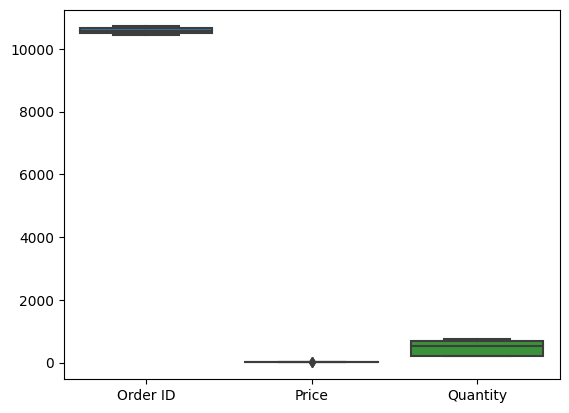

In [6]:
sns.boxplot(data=df)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [9]:
df.replace("", np.nan, inplace=True)

In [10]:
df['Total'] = df['Price'] * df['Quantity']
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.to_period('Q')

In [11]:
df.to_excel("Cleaned_Sales_Data.xlsx", index=False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            83 non-null     datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    float64       
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
 9   Total           254 non-null    float64       
 10  Year            83 non-null     float64       
 11  Month           83 non-null     float64       
 12  Day             83 non-null     float64       
 13  Weekday         83 non-null     object        
 14  Quarter         83 non-null     period[Q-DEC] 
dtypes: dat

In [13]:
invalid_dates = df[df['Date'].isna()]
print(invalid_dates[['Order ID', 'Date']])

     Order ID Date
26      10480  NaT
27      10481  NaT
28      10482  NaT
29      10486  NaT
30      10487  NaT
..        ...  ...
249     10709  NaT
250     10710  NaT
251     10711  NaT
252     10712  NaT
253     10713  NaT

[171 rows x 2 columns]


In [14]:
from dateutil import parser

def parse_date_safe(x):
    try:
        return parser.parse(str(x), dayfirst=True)  # dayfirst=True for DD/MM/YYYY
    except:
        return pd.NaT

df['Date'] = df['Date'].apply(parse_date_safe)


In [15]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.to_period('Q')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            83 non-null     datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    float64       
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
 9   Total           254 non-null    float64       
 10  Year            83 non-null     float64       
 11  Month           83 non-null     float64       
 12  Day             83 non-null     float64       
 13  Weekday         83 non-null     object        
 14  Quarter         83 non-null     period[Q-DEC] 
dtypes: dat

In [17]:
# Check the first 20 unique raw date strings
print(df['Date'].dropna().unique()[:20])


<DatetimeArray>
['2022-11-07 00:00:00', '2022-11-08 00:00:00', '2022-11-09 00:00:00',
 '2022-11-10 00:00:00', '2022-11-11 00:00:00', '2022-11-12 00:00:00',
 '2022-12-01 00:00:00', '2022-12-02 00:00:00', '2022-12-03 00:00:00',
 '2022-12-04 00:00:00', '2022-12-05 00:00:00', '2022-12-06 00:00:00',
 '2022-12-07 00:00:00', '2022-12-08 00:00:00', '2022-12-09 00:00:00',
 '2022-12-10 00:00:00', '2022-12-11 00:00:00', '2022-12-12 00:00:00']
Length: 18, dtype: datetime64[ns]


In [18]:
print(df.loc[df['Date'].isna(), 'Date'])


26    NaT
27    NaT
28    NaT
29    NaT
30    NaT
       ..
249   NaT
250   NaT
251   NaT
252   NaT
253   NaT
Name: Date, Length: 171, dtype: datetime64[ns]


In [19]:
from dateutil import parser

def parse_date_safe(x):
    try:
        return parser.parse(str(x), dayfirst=True)
    except:
        return pd.NaT

# Try parsing every value
df['Date'] = df['Date'].apply(parse_date_safe)

# Fill missing dates with the earliest available date (or choose any logic you want)
df['Date'].fillna(df['Date'].min(), inplace=True)

# Recalculate date-based columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.to_period('Q')



/tmp/ipykernel_36/4066273436.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(df['Date'].min(), inplace=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    float64       
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
 9   Total           254 non-null    float64       
 10  Year            254 non-null    int32         
 11  Month           254 non-null    int32         
 12  Day             254 non-null    int32         
 13  Weekday         254 non-null    object        
 14  Quarter         254 non-null    period[Q-DEC] 
dtypes: dat

In [21]:
df.to_excel("Cleanedd_Sales_Data.xlsx", index=False)